Import required libraires

In [1]:
import pandas as pd
import numpy as np
import easyocr
import cv2
import matplotlib.pyplot as plt
import os

Preprocessing and Data Exploration 

In [2]:
car_images_path = 'D:\Data Science\Guvi\placement\Soulpageit DS task\Licplatesdetection_train\license_plates_detection_train'
car_annotations_path = 'D:\Data Science\Guvi\placement\Soulpageit DS task\Licplatesdetection_train.csv'
license_plate_images_path = 'D:\Data Science\Guvi\placement\Soulpageit DS task\Licplatesrecognition_train\license_plates_recognition_train'
license_plate_annotations_path = 'D:\Data Science\Guvi\placement\Soulpageit DS task\Licplatesrecognition_train.csv'
test_images_path = 'D:\Data Science\Guvi\placement\Soulpageit DS task\test\test\test'

Load annotations

In [3]:
car_annotations = pd.read_csv(car_annotations_path)
license_plate_annotations = pd.read_csv(license_plate_annotations_path)

Function to load and visualize images and annotations   

In [4]:
def load_image(image_path):
    return cv2.imread(image_path)

def plot_image_with_bbox(image, bbox, title="Image with Bounding Box"):
    ymin, xmin, ymax, xmax = bbox
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

Display some sample images with bounding boxes from Training Set 1

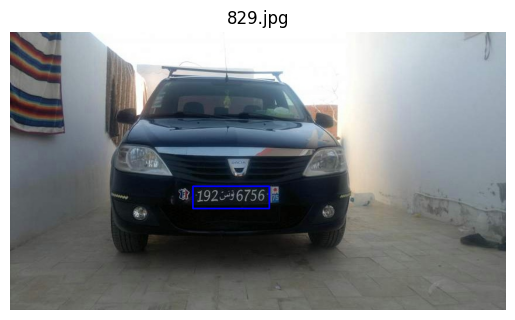

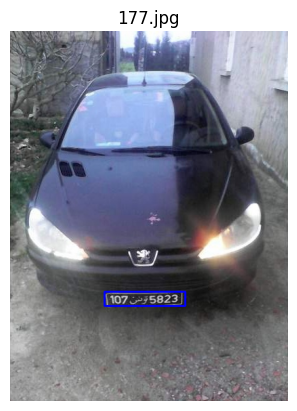

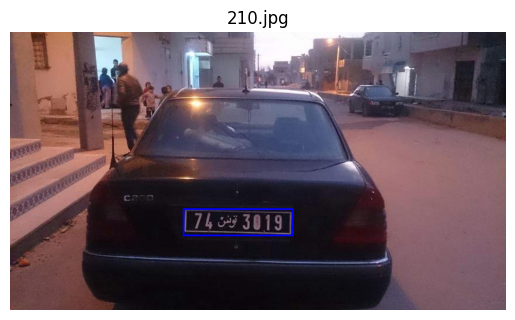

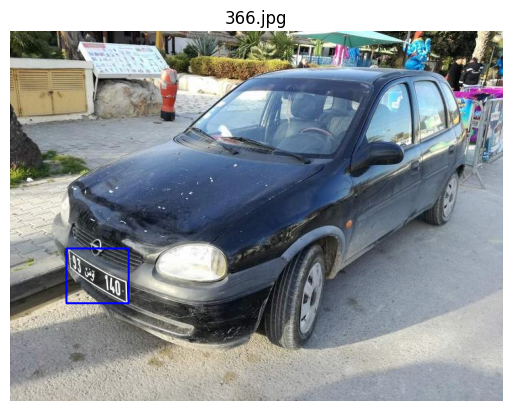

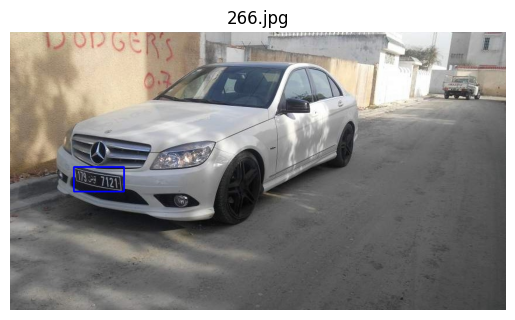

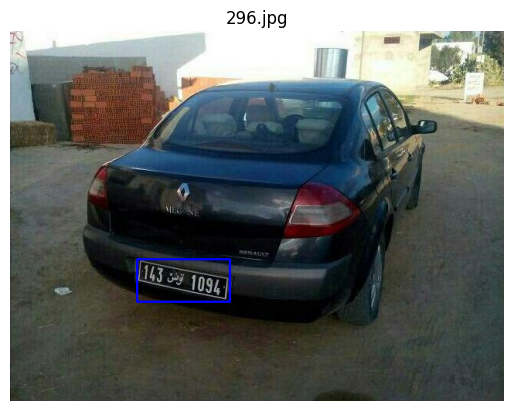

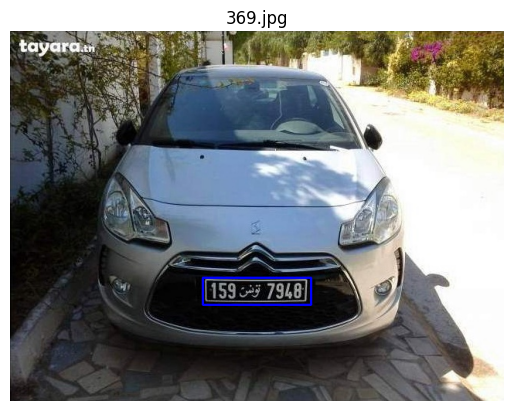

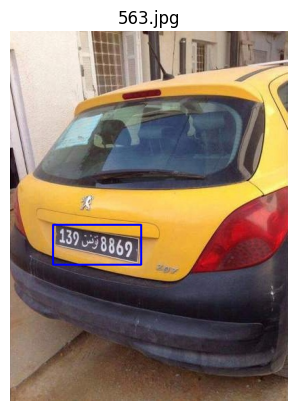

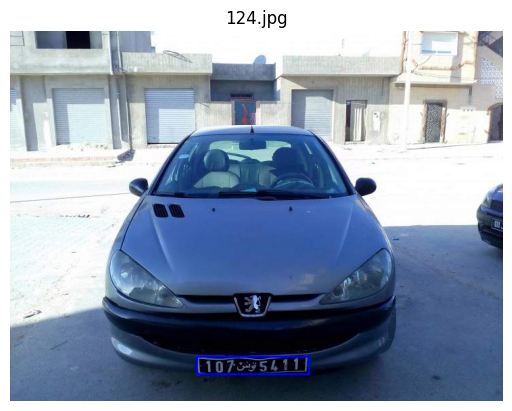

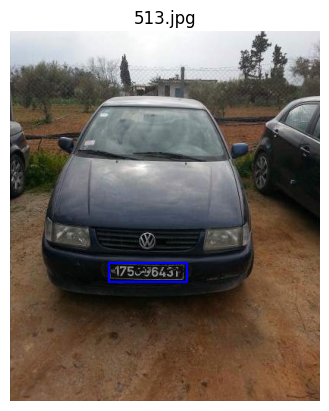

In [5]:
sample_images = car_annotations.sample(10)
for index, row in sample_images.iterrows():
    image_path = os.path.join(car_images_path, row['img_id'])
    image = load_image(image_path)
    bbox = [row['ymin'], row['xmin'], row['ymax'], row['xmax']]
    plot_image_with_bbox(image, bbox, title=row['img_id'])

Explore the car annotations dataset

In [6]:
print("Car Annotations DataFrame:")
print(car_annotations.head())

Car Annotations DataFrame:
    img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222


Check for any missing values in car annotations

In [7]:
print("\nMissing values in car annotations:")
print(car_annotations.isnull().sum())


Missing values in car annotations:
img_id    0
ymin      0
xmin      0
ymax      0
xmax      0
dtype: int64


Load and display some sample license plate images from Training Set 2

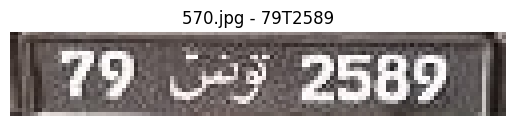

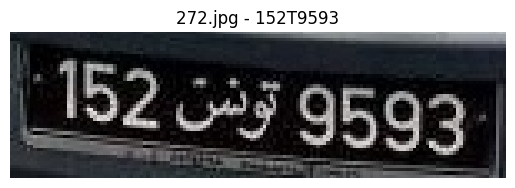

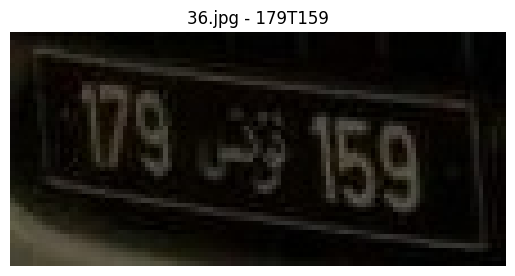

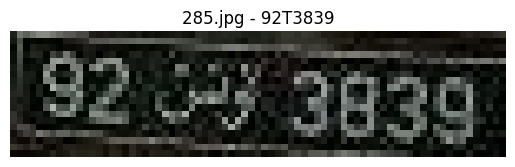

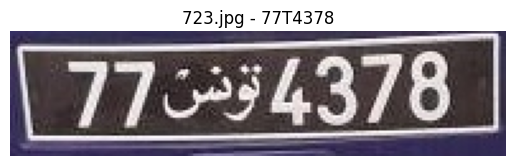

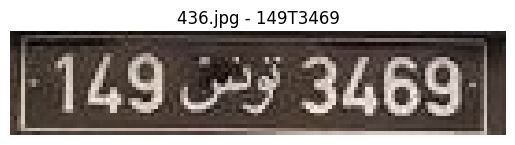

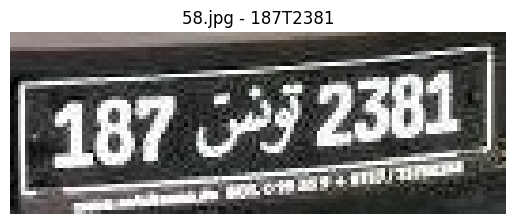

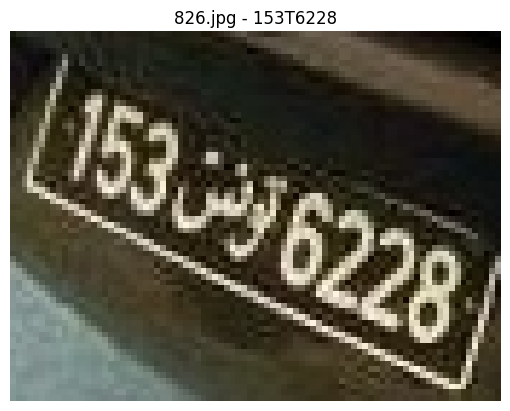

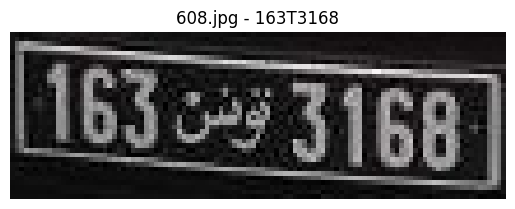

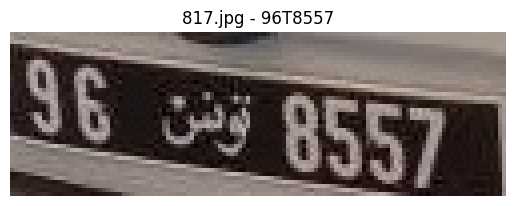

In [8]:
sample_license_plate_images = license_plate_annotations.sample(10)
for index, row in sample_license_plate_images.iterrows():
    image_path = os.path.join(license_plate_images_path, row['img_id'])
    image = load_image(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"{row['img_id']} - {row['text']}")
    plt.axis('off')
    plt.show()

Explore the license plate annotations dataset

In [9]:
print("License Plate Annotations DataFrame:")
print(license_plate_annotations.head())

License Plate Annotations DataFrame:
    img_id      text
0    0.jpg  117T3989
1    1.jpg  128T8086
2   10.jpg   94T3458
3  100.jpg  133T6719
4  101.jpg   68T5979


Check for any missing values in license plate annotations

In [10]:
print("\nMissing values in license plate annotations:")
print(license_plate_annotations.isnull().sum())


Missing values in license plate annotations:
img_id    0
text      0
dtype: int64


License Plate Detection

import required libraries

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

simple CNN model for object detection

In [12]:
def create_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    bbox_output = Dense(4, activation='linear')(x)
    model = Model(inputs, bbox_output)
    return model

input_shape = (224, 224, 3)
model = create_model(input_shape)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,398,148 (169.37 MB)

 Trainable params: 44,398,148 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

Character Recognition

Import required libraries

In [13]:
import easyocr

In [15]:
# Function to perform OCR on license plate images
reader = easyocr.Reader(['en'])

# Function to recognize characters in the image
def recognize_characters(image):
    if isinstance(image, str):  # Check if the input is a file path
        image = cv2.imread(image)  # Load the image using OpenCV if it's a file path
    elif not isinstance(image, (np.ndarray, bytes)):  # Check if the input is a NumPy array or bytes
        raise ValueError('Invalid input type. Supporting format = string(file path or url), bytes, numpy array')

    result = reader.readtext(image)
    recognized_text = ' '.join([text for text, _, _ in result])
    return recognized_text

sample_image_filename = license_plate_annotations.iloc[0]['img_id'] + '.jpg'
sample_image_path = os.path.join(license_plate_images_path, sample_image_filename)

# Recognize characters in the image
recognized_text = recognize_characters(sample_image_path)
print(f"Recognized Text: {recognized_text}")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


ValueError: Invalid input type. Supporting format = string(file path or url), bytes, numpy array

Test 2

In [334]:
import cv2
import numpy as np
import easyocr

def read_number_plate(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Use edge detection to find contours
    edged = cv2.Canny(gray, 30, 200)
    contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort the contours based on their area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    screenCnt = None

    # Loop over our contours to find the best possible approximate rectangle
    for contour in contours:
        # Approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.018 * peri, True)

        # If our approximated contour has four points, then we can assume we have found our screen
        if len(approx) == 4:
            screenCnt = approx
            break

    if screenCnt is None:
        print("No contour detected")
        return None

    # Masking the part other than the number plate
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [screenCnt], 0, 255, -1)
    new_image = cv2.bitwise_and(image, image, mask=mask)

    # Crop the rectangular region
    (x, y) = np.where(mask == 255)
    (topX, topY) = (np.min(x), np.min(y))
    (bottomX, bottomY) = (np.max(x), np.max(y))
    cropped = gray[topX:bottomX+1, topY:bottomY+1]

    # Use EasyOCR to read the text from the cropped image
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped)

    # Extract and return the text
    text = ''
    for res in result:
        text += res[1] + ' '

    return text.strip()


image_path = 'test/test/test/1039.jpg' # replace the file location
number_plate = read_number_plate(image_path)
print("Detected Number Plate:", number_plate)

# load the image which is tested
from PIL import Image
org_img = Image.open('test/test/test/1039.jpg') # replace the file location
org_img.show()

#  proper for 1039 , 964 , 977 , 987 , 917 , 905 , 930 , 938 , 942 , 957 , 959 , 974 , 1009 , 1036 , 1043 , 1054 , 
#  1057 , 1068 , 1070 .  and  not proper for 928 , 937 , 954 , 983 , 994 , 1007 , 1017 , 1064 , 1073 , 1089 , 1090 , 1102


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected Number Plate: 140 659
